In [1]:
import awkward as ak
from coffea.util import load

import numpy as np
import tools

from coffea.nanoevents.methods import candidate
ak.behavior.update(candidate.behavior)

In [2]:
#### Comparison Monte Carlo With data

# File with data
file_data = '../output/data_2017_pileup/data_2017_pileup_hists.coffea'
hists_data = load(file_data)

# File with mc 2017
file_mc = '../output/Monte_Carlo_2017/Monte_Carlo_2017_hists.coffea'

hists_mc = load(file_mc)

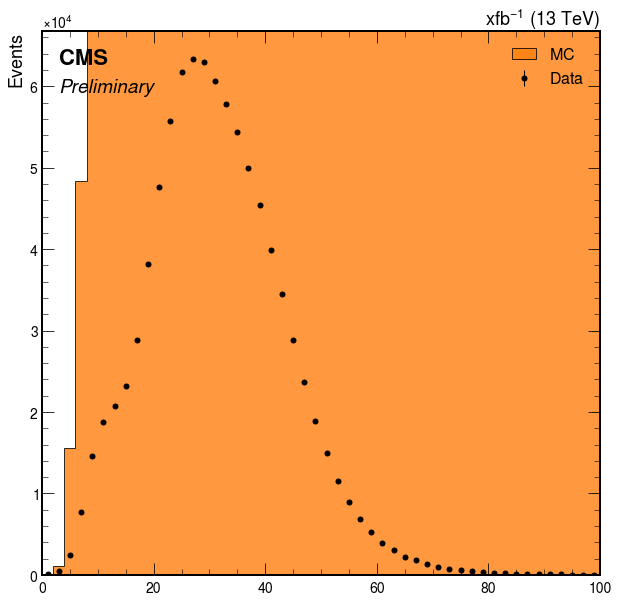

In [6]:
## Plot the histograms without correction

# Plots with no weight
ax = tools.plot_no_weight(hists_data['PV_npvs'],hists_mc['PVtx_ntrk'])

In [ ]:
# Compute the ratio between the two data and mc histogramns and returns the mean value
r = tools.get_weight(hists_data['PVtx_ntrk'], hists_mc['PVtx_ntrk'])
print(f"The mean ratio value between data and mc histogram is: {np.round(r,2)}")

In [ ]:
# Scale the MC histogram with the ratio calculated
hist_weight = hists_mc['PVtx_ntrk']
hist_weight.scale(r)

In [ ]:
# Plots the two histograms with correction and with the ratio
ax, rax = tools.ratio_plot(hists_data['PVtx_ntrk'], hist_weight)#hists_mc['Primary_vertex_npvs'])
ax.set_ylim(0, 2e6)

In [ ]:
# Some tests
rjpsi = tools.get_weight(hists_data['Jpsi_mass'], hists_mc['Jpsi_mass'])
rjpsi

(<AxesSubplot:ylabel='Events'>,
 <AxesSubplot:xlabel='$M_{\\mu^+\\mu^-}$ [GeV]', ylabel='Ratio'>)

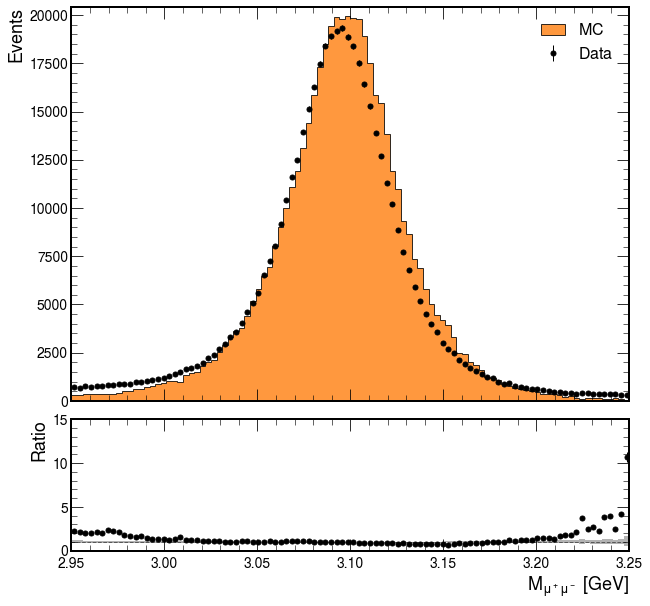

In [33]:
hist_aux = hists_mc['Jpsi_mass']
hist_aux.scale(6)
tools.ratio_plot(hists_data['Jpsi_mass'], hists_mc['Jpsi_mass'] )